In [106]:
data =pd.read_csv('car_data.csv')
show = pd.DataFrame(data)
show.head(10)
show['Gender'] = show['Gender'].replace({'Male': 1, 'Female': 0})
print(show)

     User ID  Gender  Age  AnnualSalary  Purchased
0        385       1   35         20000          0
1        681       1   40         43500          0
2        353       1   49         74000          0
3        895       1   40        107500          1
4        661       1   25         79000          0
..       ...     ...  ...           ...        ...
995      863       1   38         59000          0
996      800       0   47         23500          0
997      407       0   28        138500          1
998      299       0   48        134000          1
999      687       0   44         73500          0

[1000 rows x 5 columns]


C:\Users\swp\AppData\Local\Temp\ipykernel_6140\1670335850.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  show['Gender'] = show['Gender'].replace({'Male': 1, 'Female': 0})


In [108]:
show.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [110]:
show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   User ID       1000 non-null   int64
 1   Gender        1000 non-null   int64
 2   Age           1000 non-null   int64
 3   AnnualSalary  1000 non-null   int64
 4   Purchased     1000 non-null   int64
dtypes: int64(5)
memory usage: 39.2 KB


In [125]:
x = show[['User ID','Gender', 'Age'	,'AnnualSalary']]
x

,User ID,Gender,Age,AnnualSalary
0,385,1,35,20000
1,681,1,40,43500
2,353,1,49,74000
3,895,1,40,107500
4,661,1,25,79000
...,...,...,...,...
995,863,1,38,59000
996,800,0,47,23500
997,407,0,28,138500
998,299,0,48,134000


In [127]:
y = show['Purchased']
y

0      0
1      0
2      0
3      1
4      0
      ..
995    0
996    0
997    1
998    1
999    0
Name: Purchased, Length: 1000, dtype: int64

In [194]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.20 , random_state = 42)
x_train

,User ID,Gender,Age,AnnualSalary
29,994,0,38,147500
535,833,0,59,24500
695,79,1,35,91000
557,38,0,43,76500
836,732,0,31,118000
...,...,...,...,...
106,398,1,36,56500
270,35,0,42,53000
860,626,0,37,33000
435,931,0,43,112000


In [196]:
y_train

29     1
535    1
695    1
557    0
836    1
      ..
106    0
270    0
860    0
435    1
102    0
Name: Purchased, Length: 800, dtype: int64

In [198]:
model = LinearRegression()
model.fit(x_train , y_train)

LinearRegression()

In [200]:
model.coef_

array([7.89213896e-06, 3.46562112e-02, 2.57997623e-02, 4.09300044e-06])

In [202]:
production = model.predict(x_test)

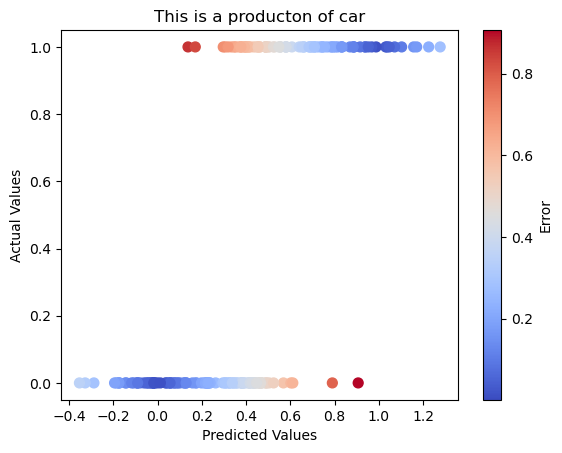

In [204]:
error = np.abs(production - y_test)

plt.scatter(production , y_test , c =error , cmap = 'coolwarm' , s= 50)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('This is a producton of car')

plt.colorbar(label = 'Error')
plt.show()

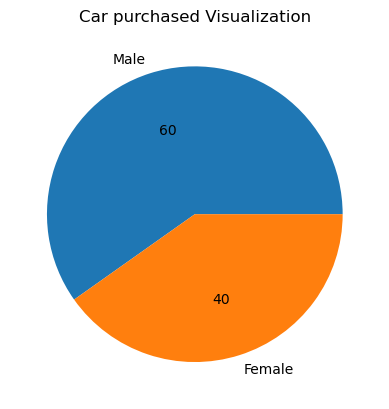

In [205]:
plt.pie(show.Purchased.value_counts() , labels= ['Male' , 'Female'], autopct = '%.f')
plt.title('Car purchased Visualization')
plt.show()

In [208]:
Result = pd.DataFrame({'Actual' : y_test , "Priduction" : production})
Result.head(100)

,Actual,Priduction
521,0,0.437014
737,1,1.157323
740,0,-0.031387
660,1,0.433801
411,0,0.789835
...,...,...
436,1,0.661152
764,0,0.568754
88,0,0.040171
63,0,0.324796
